![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [22]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [23]:
 crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         247988 non-null  int64         
 1   Date Rptd     247988 non-null  datetime64[ns]
 2   DATE OCC      247988 non-null  datetime64[ns]
 3   TIME OCC      247988 non-null  object        
 4   AREA NAME     247988 non-null  object        
 5   Crm Cd Desc   247988 non-null  object        
 6   Vict Age      247988 non-null  int64         
 7   Vict Sex      215740 non-null  object        
 8   Vict Descent  215739 non-null  object        
 9   Weapon Desc   80087 non-null   object        
 10  Status Desc   247988 non-null  object        
 11  LOCATION      247988 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 22.7+ MB


## Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

Based on the dataset head and dataset information above, we can observe that the `TIME OCC` column isn't a datetime object; rather, its values are stored in 'HHMM' string format. Let's begin by converting it to datetime format. Afterward, we can extract the hour to calculate the frequency of occurrences for each hour.

In [24]:
# Convert the 'TIME OCC' column to timedelta format
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M')
# Extract the hour and store it in 'HOUR OCC' column
crimes['HOUR OCC'] = crimes['TIME OCC'].dt.hour
# Calculate the frequency for each hour
crimes['HOUR OCC'].value_counts()

12    17065
18    14447
17    14107
20    13325
19    13146
16    12676
15    12671
21    12008
14    11889
22    11697
11    11120
13    11009
10    10720
0     10696
23    10039
8      9600
9      9138
1      7564
7      7011
6      7008
2      6352
3      5564
4      4696
5      4440
Name: HOUR OCC, dtype: int64

In [25]:
# Store the hour with the highest frequency
peak_crime_hour = crimes['HOUR OCC'].value_counts().index[0]
print(f"The peak crime hour happens at {peak_crime_hour}:00 (24-hour format)")

The peak crime hour happens at 12:00 (24-hour format)


This is actually interesting information! The peak hour seems to occur right in the middle of the day, around lunchtime. To help our fellow detectives and police department, let's visualize the distribution of total crimes per hour 🕵️

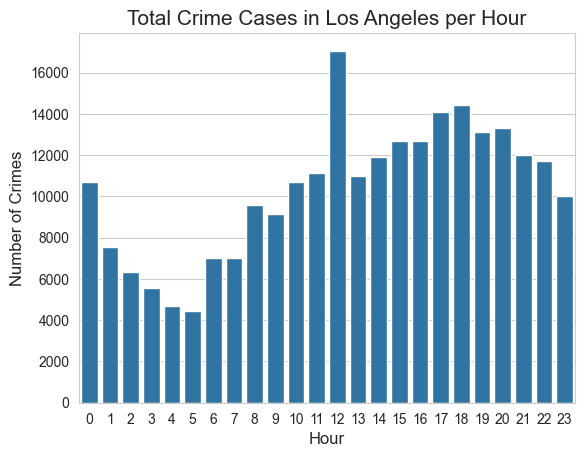

In [26]:
# Visualize total crimes per hour using countplot
sns.set_style("whitegrid")
sns.countplot(data=crimes, x='HOUR OCC')

plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.title("Total Crime Cases in Los Angeles per Hour", fontsize=15)
plt.show()

## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.

To answer this question, we can filter our dataset using `HOUR OCC` column we've created earlier! Then use `value_counts()` function to get the location with the highest frequency of occurrences!

In [27]:
# Filter rows with hours between 10 PM and 3:59 AM
night_crimes = crimes[(crimes["HOUR OCC"] >= 22) | (crimes["HOUR OCC"] <= 4)]
night_crimes.head()                             

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
9,231207476,2023-02-27,2020-08-15,1900-01-01 00:01:00,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
12,221711184,2022-06-15,2020-05-15,1900-01-01 01:55:00,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
36,221314362,2022-07-11,2020-04-07,1900-01-01 00:01:00,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
39,231307252,2023-03-03,2020-07-05,1900-01-01 23:05:00,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
42,221614254,2022-11-13,2020-01-01,1900-01-01 00:01:00,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0


In [28]:
# Calculate the frequency
night_crimes['AREA NAME'].value_counts()

Central        4432
77th Street    3653
Hollywood      3583
Newton         3178
Olympic        3122
Southeast      3088
Pacific        3058
Southwest      3014
N Hollywood    2880
Rampart        2676
Northeast      2526
Wilshire       2450
West Valley    2349
Harbor         2301
Van Nuys       2273
Devonshire     2076
Hollenbeck     2061
Mission        2049
West LA        2048
Topanga        1906
Foothill       1885
Name: AREA NAME, dtype: int64

So, it appears that the Central Area experiences the highest incidence of nighttime crime in Los Angeles! Let's make sure to store this information as instructed; it will be valuable for our fellow detectives and police members 🕵️👮

In [29]:
# Store the location with the highest frequency of night crimes
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().index[0]
print("Area in Los Angeles with the largest frequency of night crimes is", peak_night_crime_location)

Area in Los Angeles with the largest frequency of night crimes is Central


## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+). Save as a pandas Series called victim_ages.

Let's begin by observing the frequency of occurrences for each age

In [30]:
# Calculate the frequency of 'Vict Age' column
crimes['Vict Age'].value_counts().sort_index()

-2         7
-1        26
 0     62240
 2        45
 3        62
       ...  
 95       25
 96       27
 97       22
 98       17
 99      105
Name: Vict Age, Length: 101, dtype: int64

There are negative values which doesn't make sense for age column, we can exclude those values. Let's create the bins and labels for grouping the age, then calculate the frequency of occurences for each age group as instructed!

In [31]:
# Define age group bins
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]  # Last bin for 65+
# Define age group labels
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

# Cut the 'victim_age' column into age groups
crimes["Age Group"] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels)

# Calculate the frequency of crimes for each age group
victim_ages = crimes["Age Group"].value_counts()
victim_ages

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Age Group, dtype: int64